<a href="https://colab.research.google.com/github/chloehmiri/Supervised-Learning-Regression-Analysis-Work/blob/main/SLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simple Linear Regression with Ice Cream Sales**

Create dataframe

BELOW is the EXAMPLE for ICECREAM SALES temp will represent the temperature of some day and the gallon will represent how many gallons of ice cream we sell on that day. We have 10 days of data.

predict "gallons" from "temp", gallon is our y and temp is x.
y is the predicted variable and x is the predictor

In [ ]:
temp <- c(73,65,81,90,75,77,82,93,86,79)
gallons <- c(110,95,135,160,97,105,120,175,140,121)

In [ ]:
# create a data frame using two vectors.
ice <- data.frame(temp, gallons) #temp is the 1st column, gallons is the 2nd column
ice

temp,gallons
<dbl>,<dbl>
73,110
65,95
81,135
90,160
75,97
77,105
82,120
93,175
86,140


In [ ]:
str(ice)

'data.frame':	10 obs. of  2 variables:
 $ temp   : num  73 65 81 90 75 77 82 93 86 79
 $ gallons: num  110 95 135 160 97 105 120 175 140 121


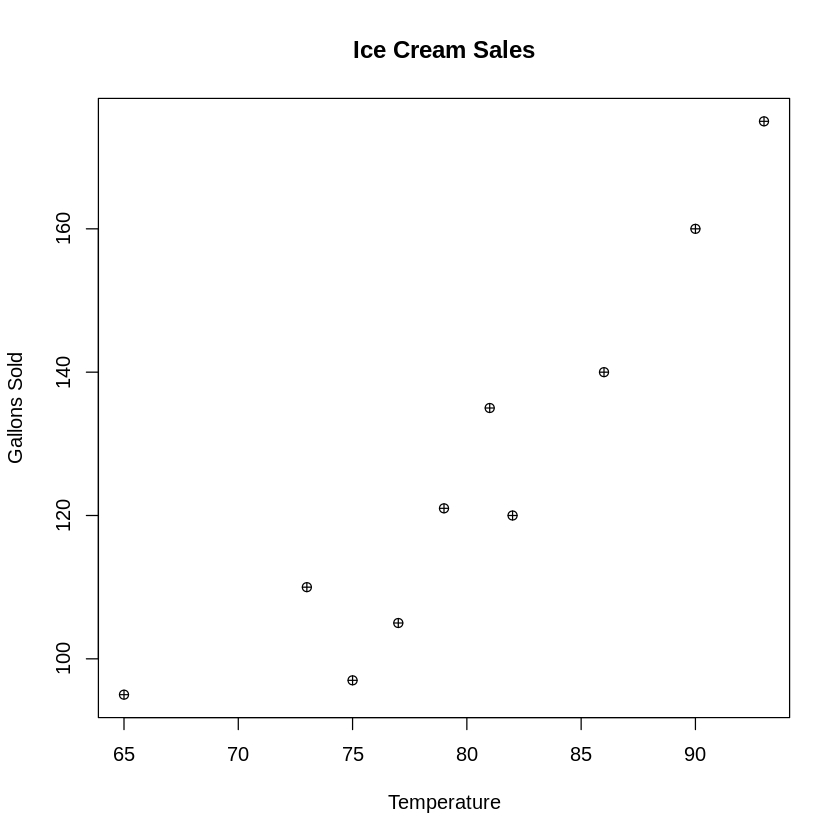

In [ ]:
plot(ice, main = "Ice Cream Sales", xlab = "Temperature", ylab = "Gallons Sold", pch=10)

**Correlation**

We do want to identify two variables (temp, gallons) are highly correlated.

In [ ]:
cor(ice$temp, ice$gallons)

[1] 0.9291076

In [ ]:
# 0.929 is very close to 1. I can say it is a strong and positive correlation.
# btw TEMP and GALLONS SOLD
# this is just correlation NOT CAUSATION

**Regression Analysis Output**

We can do this by call Lm function "linear model"

In [ ]:
lm(gallons ~ temp, data=ice)


Call:
lm(formula = gallons ~ temp, data = ice)

Coefficients:
(Intercept)         temp  
   -113.400        2.986  


**Regression Equation**: Y^= b0 + (b1 * X)

so, based on the equation formula, Y^ (gallons) = -113.400 + 2.986X (temp)

In [ ]:
model <- lm(gallons ~ temp, data=ice)
summary(model)


Call:
lm(formula = gallons ~ temp, data = ice)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.570  -9.460   1.560   6.235  14.293 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -113.3999    33.8231  -3.353 0.010039 *  
temp           2.9863     0.4202   7.106 0.000101 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.45 on 8 degrees of freedom
Multiple R-squared:  0.8632,	Adjusted R-squared:  0.8461 
F-statistic:  50.5 on 1 and 8 DF,  p-value: 0.0001014


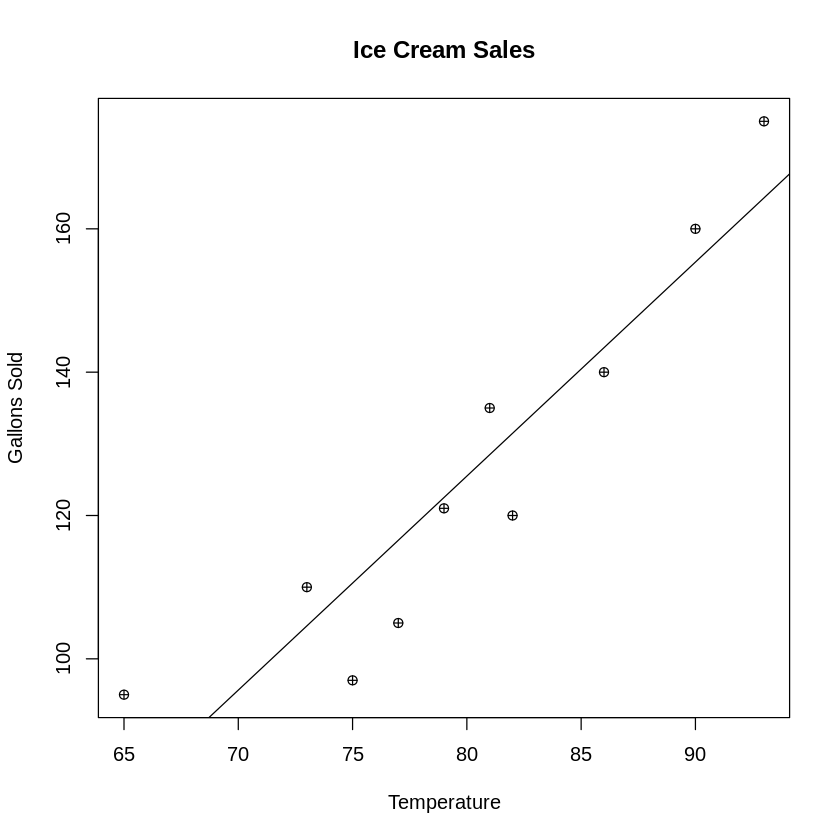

In [ ]:
plot(ice, main = "Ice Cream Sales", xlab = "Temperature", ylab = "Gallons Sold", pch=10)
abline(model)

In [ ]:
# predict how many gallons of ice cream sold when the temperature is 89
predict(model, data.frame(temp = 89))

1 
152.3778

In [ ]:
predict(model, data.frame(temp = c(91,72)))

1        2 
158.3503 101.6112

In [ ]:
# use this regression model
# 95% prediction interval for each of these predictions
predict (model, data.frame(temp = c(89,91,72)), interval = "prediction", level = .95)

,fit,lwr,upr
1,152.3778,125.6623,179.0932
2,158.3503,130.9477,185.7529
3,101.6112,75.1359,128.0866


**Cosmetic Sales Simple Linear Regression (SLR)**

In [ ]:
cos <- "https://raw.githubusercontent.com/jahn2178/ma322/main/cosmetic_sales.csv"
cos <- read.csv(cos, stringsAsFactors = TRUE)
str(cos)

'data.frame':	1891 obs. of  8 variables:
 $ salesperson : Factor w/ 9 levels "Ashley","Betsy",..: 2 7 1 7 9 4 5 4 1 2 ...
 $ year        : int  2004 2004 2005 2006 2004 2005 2004 2006 2006 2006 ...
 $ month       : Factor w/ 12 levels "April","August",..: 1 8 4 9 7 10 8 3 10 2 ...
 $ dept        : Factor w/ 5 levels "eye liner","foundation",..: 3 2 4 3 3 1 1 3 1 3 ...
 $ location    : Factor w/ 4 levels "east","midwest",..: 3 2 2 4 2 2 2 2 3 1 ...
 $ units_sold  : int  8 151 416 202 167 390 207 134 226 188 ...
 $ order_amount: int  288 448 402 650 347 485 500 536 499 436 ...
 $ cost        : int  227 320 347 561 219 392 427 426 402 314 ...


In [ ]:
# we want to know if a VAR can help to predict another VAR so the
# first step might be look at ALL THE POSSIBLE CORRELATIONS in order to
# do that, let's extract only NUM/QUANT VARs

In [ ]:
# extract 1891 rows / examples, with only INT features, column 2,6,7,8
# the formula for EXTRACTION: data_set_name[ROW, COLUMNS] BRAKET
cos2 <- cos[1:1891, c(2,6,7,8)]
str(cos2)

cos3 <- cos[, c(2,6,7,8)]
str(cos3)

cos4 <- cos[1:1891, c("year","units_sold","order_amount","cost")] # use name of features
str (cos4)

cos5 <- cos[1:1891, -c(1,3,4,5)] # these are what we don't want
str (cos5)

'data.frame':	1891 obs. of  4 variables:
 $ year        : int  2004 2004 2005 2006 2004 2005 2004 2006 2006 2006 ...
 $ units_sold  : int  8 151 416 202 167 390 207 134 226 188 ...
 $ order_amount: int  288 448 402 650 347 485 500 536 499 436 ...
 $ cost        : int  227 320 347 561 219 392 427 426 402 314 ...
'data.frame':	1891 obs. of  4 variables:
 $ year        : int  2004 2004 2005 2006 2004 2005 2004 2006 2006 2006 ...
 $ units_sold  : int  8 151 416 202 167 390 207 134 226 188 ...
 $ order_amount: int  288 448 402 650 347 485 500 536 499 436 ...
 $ cost        : int  227 320 347 561 219 392 427 426 402 314 ...
'data.frame':	1891 obs. of  4 variables:
 $ year        : int  2004 2004 2005 2006 2004 2005 2004 2006 2006 2006 ...
 $ units_sold  : int  8 151 416 202 167 390 207 134 226 188 ...
 $ order_amount: int  288 448 402 650 347 485 500 536 499 436 ...
 $ cost        : int  227 320 347 561 219 392 427 426 402 314 ...
'data.frame':	1891 obs. of  4 variables:
 $ year        : int

In [ ]:
# by using numerical features we extract
# correlation of cos2
cor(cos2)

,year,units_sold,order_amount,cost
year,1.00000000,-0.04963881,-0.01126555,-0.01267833
units_sold,-0.04963881,1.00000000,0.42234235,0.44234534
order_amount,-0.01126555,0.42234235,1.00000000,0.94803496
cost,-0.01267833,0.44234534,0.94803496,1.00000000


order_amount and cost = 0.948, strong correlation, we want investigate more about order_amoung and cost

The one with strong correlation, order_amount and cost, we want to further dig into

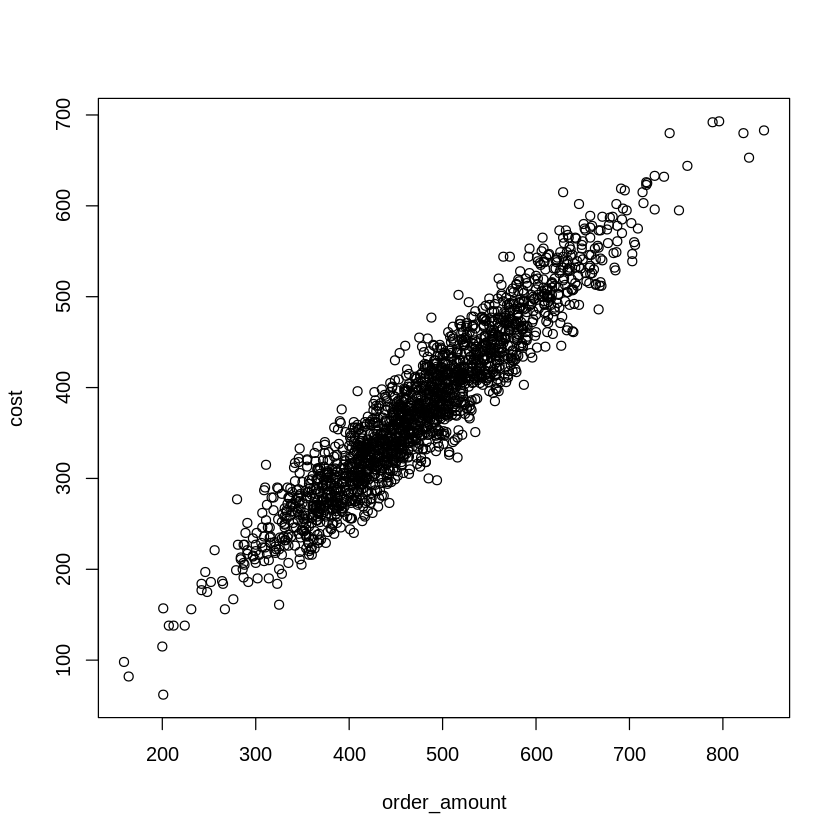

In [ ]:
# plot (Y_VAR ~ X_VAR, data = name_of_dataset)
# from our observation, we assume there is a high correlation between two features
plot(cost ~ order_amount, data=cos2)

In [ ]:
# create regression model
# so now with these to QUANT variables, i am going to create a regression model
lm(cost ~ order_amount, data=cos2) #lm: linear model
# in front of ~ is always Y VARIABLE (QUANT)
# I want to cost to be the prediction (Y hat), and pretend I am a ceo of cosmetic company
# I want to see order_amount is the predictor variable (X) for cost
# how much it's going to cost


Call:
lm(formula = cost ~ order_amount, data = cos2)

Coefficients:
 (Intercept)  order_amount  
    -59.0349        0.9139  


In [ ]:
# regression equation: y^ = b0 + b1 + x^
# y_hat, yhat
# we can write out the regression equation
# y^ = -59.0349 + 0.9139*X

# If I told you contexualize the regression equation
# cost_hat = -59.0349 + 0.9139*(order_amount)

In [ ]:
# regression equation: y^ = b0 + b1 + x^
model2 <- lm(cost ~ order_amount, data=cos2) # assign this lm model, model2
summary (model2)
# basically, same information as above, but represented as vertically


Call:
lm(formula = cost ~ order_amount, data = cos2)

Residuals:
    Min      1Q  Median      3Q     Max 
-94.420 -19.607  -0.439  18.855  99.206 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -59.034889   3.436224  -17.18   <2e-16 ***
order_amount   0.913877   0.007057  129.50   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.08 on 1889 degrees of freedom
Multiple R-squared:  0.8988,	Adjusted R-squared:  0.8987 
F-statistic: 1.677e+04 on 1 and 1889 DF,  p-value: < 2.2e-16


In [ ]:
# I want you to focus on multiple R-squared, unless I ask to report/look at Adjusted R-squared

# Multiple R-squared: 0.8988
# Is the R-squared high?
# technically we do not know
# usually it is best if you can have an anchor value or some comparison
# however, knowing that the highest r^2 can be 1 and this is close to 0.9
# It is not unreasonable to say it is quite high

R-squared is between 0 and 1, our regression line has an R-squared of 0.90, which helps us evaluate the regression line as a good line that represents all the data sets well

*= almost 90% of the variation of the cost can be explained by order_amount*

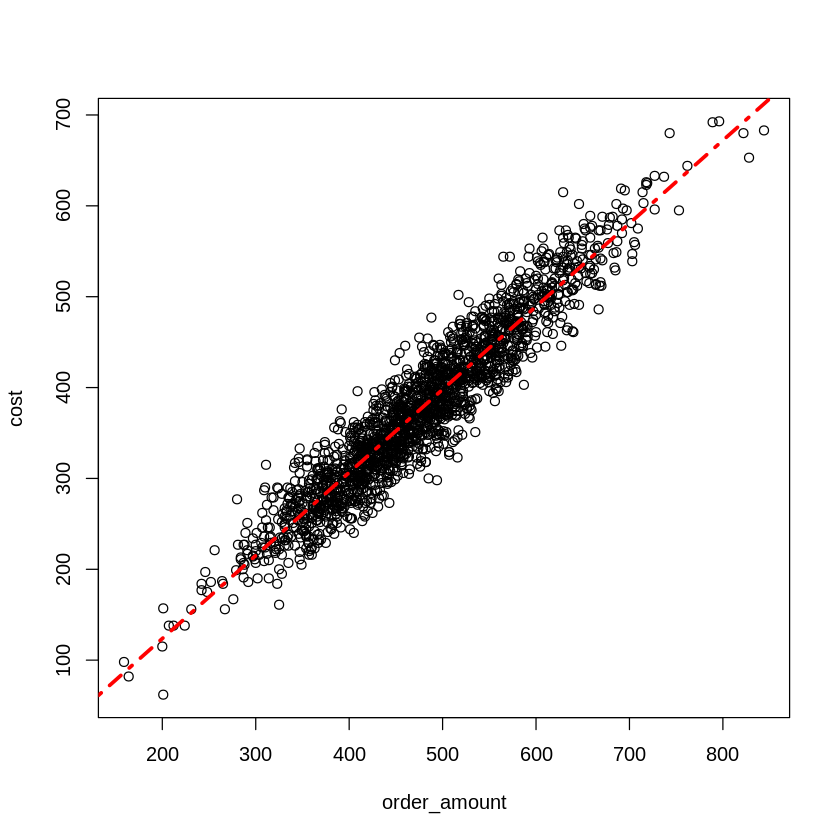

In [ ]:
# now we are going to plot the regression model on to the scatterplot
plot(cost ~ order_amount, data=cos)
abline(model2, pch=5, col="red", lty=4, lwd=3) # prediction line
# all the data points are tightly surrounding the regression line

# lty = line style / lwd = lind width

In [ ]:
# we can now make PREDICTIONS
# going to use model2 equation, and plug into x and give y
predict(model2, data.frame(order_amount=150))

# predict(model2, data.fram(x_variables))

1 
78.04663

In [ ]:
# use the regression model (model2) you learned to predict
# how much cost needed when order_amount is 150 along with a 95% prediction interval for each of these predictions

predict(model2, data.frame(order_amount=150), interval="prediction", level=.95)

,fit,lwr,upr
1,78.04663,20.81618,135.2771
